#### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

#### Load dataset

In [2]:
reviews_data = pd.read_csv("data/cleaned_reviews_lemmatized_data.csv")

#### Inspect first 5 rows and data types of the dataset

In [3]:
reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place
1,Crust is not good.,0,crust good,crust is not good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...


In [4]:
reviews_data.shape

(899, 4)

In [5]:
reviews_data = reviews_data.dropna()

#### Tokenize data

In [6]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_lemmatized'].apply(word_tokenize)

#### Visualise most common words with lemmatized data

In [7]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [8]:
reviews = reviews_data['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['wow',
 '...',
 'love',
 'place',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stop']

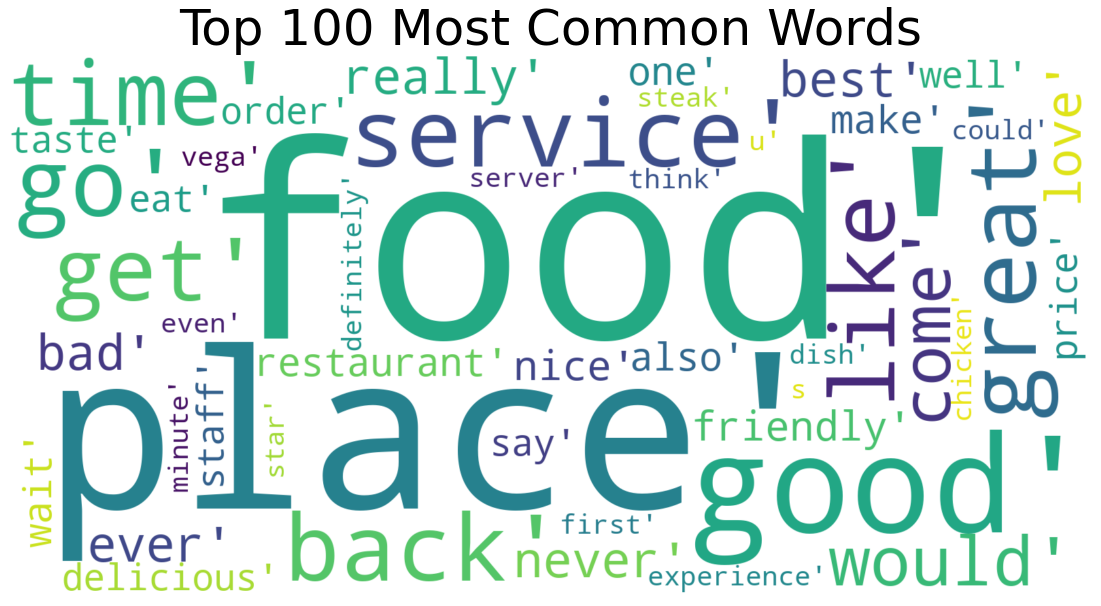

In [9]:
mostcommon = FreqDist(reviews_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.show()